In [7]:
# HCASE_Plot_Cherry_Picked_Scaffolds_MaintText
#
# Author: Gergely Zahoranszky-Kohalmi, PhD
#
# Email: gergely.zahoranszky-kohalmi@nih.gov
#
# Organization: National Center for Advancing Translational Sciences (NCATS/NIH)
#

In [8]:
import hcase
import pandas as pd

import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [9]:
# Config section


fname_structures = '../../data/cherrypicked_scaffolds.tab'

fname_rnd_5_drugs_and_knns = '../../data/rnd_5_app_drugs_drugbank_knn_5.tab'



fname_embedding = '../../data/cp_scaffolds_hcase_chembl_24_1_bms_dim_2.tab'

fname_red_embedding = '../../data/red_cp_scaffolds_hcase_chembl_24_1_bms_dim_2.tab'


fname_knn_drugs_emb_hcase_chembl_coordinates = '../../data/knn_coords_app_drugs_drugbank_chembl_24_1_bms.tab'

fname_red_knn_drugs_emb_hcase_chembl_coordinates = '../../data/si_red_knn_coords_app_drugs_drugbank_chembl_24_1_bms.tab'





fname_out_panel_hcase_plot = '../../plots/main_hcase_panel.png'




In [10]:
# Read input

df_structures = pd.read_csv (fname_structures, sep = '\t')
df_knns = pd.read_csv (fname_rnd_5_drugs_and_knns, sep ='\t')

df_emb = pd.read_csv (fname_embedding, sep ='\t')

df_red_emb = pd.read_csv (fname_red_embedding, sep ='\t')

df_knn_emb = pd.read_csv (fname_knn_drugs_emb_hcase_chembl_coordinates, sep ='\t')

df_red_knn_emb = pd.read_csv (fname_red_knn_drugs_emb_hcase_chembl_coordinates, sep ='\t')


In [11]:
# Functions

def separate_query_from_target_mols (df_knn):
    df_target = df_knn[['knn_target_id', 'knn_target_structure', 'knn_color', 'data_label']].copy()
    df_target['knn_type'] = 'nn'
    df_target = df_target.rename(columns = {
        'knn_target_id': 'id',
        'knn_target_structure': 'smiles'
    #    'knn_color': 'color'
    })

    df_query = df_knn[['knn_query_id', 'knn_query_structure', 'knn_color', 'data_label']].copy()
    df_query['knn_type'] = 'parent'
    df_query = df_query.rename(columns = {
        'knn_query_id': 'id',
        'knn_query_structure': 'smiles'
    #    'knn_color': 'color'
    })

    df_query = df_query.groupby(['id'], as_index = False).agg({
        'smiles': 'first',
         'knn_color': 'first',
         'knn_type': 'first',
         'data_label': 'first'
    })

    df_query = df_query.reset_index(drop = True)

    # df_knn = df_query.append(df_target, ignore_index = True)
    df_knn = pd.concat([df_query, df_target], ignore_index = True)

    return (df_knn)



def panel_plot_multi_scaffolds (subfig, df, subfig_label, z):
    #print(df.columns)

    #print(df.head)
    

    # Comment this out if you want image titles.
    #plt.title (title)

    
    
    tab10_palette = ['#1179B0', '#F58C30', '#74BB5A', '#BC412C', '#795B9A', '#764A0C', '#D37DB5', '#7A7A7A', '#B8C449']

    df_1 = df[df['color'] == 1].copy()
    df_2 = df[df['color'] == 2].copy()
    df_3 = df[df['color'] == 3].copy()
    df_4 = df[df['color'] == 4].copy()
    df_5 = df[df['color'] == 5].copy()
    df_6 = df[df['color'] == 6].copy()
    df_7 = df[df['color'] == 7].copy()
    df_8 = df[df['color'] == 8].copy()
    df_9 = df[df['color'] == 9].copy()


    color_1 = list(df_1['color'])[0] - 1
    color_2 = list(df_2['color'])[0] - 1
    color_3 = list(df_3['color'])[0] - 1
    color_4 = list(df_4['color'])[0] - 1
    color_5 = list(df_5['color'])[0] - 1
    color_6 = list(df_6['color'])[0] - 1
    color_7 = list(df_7['color'])[0] - 1
    color_8 = list(df_8['color'])[0] - 1
    color_9 = list(df_9['color'])[0] - 1
 
    #print("color")
    #print(color_1)




    subfig.scatter(df_1['Dim_1'].values, df_1['Dim_2'].values, c = tab10_palette[color_1], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_2['Dim_1'].values, df_2['Dim_2'].values, c = tab10_palette[color_2], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_3['Dim_1'].values, df_3['Dim_2'].values, c = tab10_palette[color_3], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_4['Dim_1'].values, df_4['Dim_2'].values, c = tab10_palette[color_4], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_5['Dim_1'].values, df_5['Dim_2'].values, c = tab10_palette[color_5], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_6['Dim_1'].values, df_6['Dim_2'].values, c = tab10_palette[color_6], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_7['Dim_1'].values, df_7['Dim_2'].values, c = tab10_palette[color_7], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_8['Dim_1'].values, df_8['Dim_2'].values, c = tab10_palette[color_8], alpha = 0.3, marker = 'o', s = 100)
    subfig.scatter(df_9['Dim_1'].values, df_9['Dim_2'].values, c = tab10_palette[color_9], alpha = 0.3, marker = 'o', s = 100)

    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    

    subfig.set_xlim(left = -1)
    subfig.set_ylim(bottom = -1)    
    subfig.set_xlim(right = int(math.pow(2, z)) - 1 + 5)
    subfig.set_ylim(top = int(math.pow(2, z)) - 1 + 5)


def color_scaffolds (df_coords, df_color):
    df = df_coords.merge(df_color, on = 'id', how = 'inner')
    
    return (df)


def panel_plot_multi (subfig, df, df_knn, subfig_label):
    #df = df [df[df['hc_order'] == hc_order]
    df_other = df[df['knn_type'] == 'other']
    
    
    df_1 = df[df['knn_color'] == 1]
    df_1_parent = df_1[df_1['knn_type'] == 'parent']
    df_1_nn = df_1[df_1['knn_type'] == 'nn']

    #print (df.head)
    #print (df_knn.head)
    
    df_1_nn = df_1_nn.drop(columns = ['knn_color'])
    df_1_nn = df_1_nn.merge(df_knn, on = 'id', how = 'inner')
    
    #print (df_1_parent.head)
    #print (df_1_nn.head)


    df_2 = df[df['knn_color'] == 2]
    df_2_parent = df_2[df_2['knn_type'] == 'parent']
    df_2_nn = df_2[df_2['knn_type'] == 'nn']

    df_2_nn = df_2_nn.drop(columns = ['knn_color'])
    df_2_nn = df_2_nn.merge(df_knn, on = 'id', how = 'inner')



    df_3 = df[df['knn_color'] == 3]
    df_3_parent = df_3[df_3['knn_type'] == 'parent']
    df_3_nn = df_3[df_3['knn_type'] == 'nn']

    df_3_nn = df_3_nn.drop(columns = ['knn_color'])
    df_3_nn = df_3_nn.merge(df_knn, on = 'id', how = 'inner')


    df_4 = df[df['knn_color'] == 4]
    df_4_parent = df_4[df_4['knn_type'] == 'parent']
    df_4_nn = df_4[df_4['knn_type'] == 'nn']

    df_4_nn = df_4_nn.drop(columns = ['knn_color'])
    df_4_nn = df_4_nn.merge(df_knn, on = 'id', how = 'inner')


    df_5 = df[df['knn_color'] == 5]
    df_5_parent = df_5[df_5['knn_type'] == 'parent']
    df_5_nn = df_5[df_5['knn_type'] == 'nn']

    df_5_nn = df_5_nn.drop(columns = ['knn_color'])
    df_5_nn = df_5_nn.merge(df_knn, on = 'id', how = 'inner')


    
 


    subfig.scatter(df_other['Dim_1'].values, df_other['Dim_2'].values, c = 'gray', alpha = 0.3, marker = '.')

    subfig.scatter(df_1_parent['Dim_1'].values, df_1_parent['Dim_2'].values, c = 'blue', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_1_nn['Dim_1'].values, df_1_nn['Dim_2'].values, c = 'blue', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_1_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_1_nn['Dim_1'].values[i], df_1_nn['Dim_2'].values[i])))

    subfig.scatter(df_2_parent['Dim_1'].values, df_2_parent['Dim_2'].values, c = 'green', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_2_nn['Dim_1'].values, df_2_nn['Dim_2'].values, c = 'green', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_2_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_2_nn['Dim_1'].values[i], df_2_nn['Dim_2'].values[i])))



    subfig.scatter(df_3_parent['Dim_1'].values, df_3_parent['Dim_2'].values, c = 'purple', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_3_nn['Dim_1'].values, df_3_nn['Dim_2'].values, c = 'purple', alpha = 0.7, marker = '+', s = 100)

    for i, txt in enumerate(list(df_3_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_3_nn['Dim_1'].values[i], df_3_nn['Dim_2'].values[i])))



    subfig.scatter(df_4_parent['Dim_1'].values, df_4_parent['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_4_nn['Dim_1'].values, df_4_nn['Dim_2'].values, c = 'orangered', alpha = 0.7, marker = '+', s = 100)


    for i, txt in enumerate(list(df_4_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_4_nn['Dim_1'].values[i], df_4_nn['Dim_2'].values[i])))



    subfig.scatter(df_5_parent['Dim_1'].values, df_5_parent['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = 'x', s = 200)
    subfig.scatter(df_5_nn['Dim_1'].values, df_5_nn['Dim_2'].values, c = 'aqua', alpha = 0.7, marker = '+', s = 100)
    
    subfig.set_title (subfig_label, fontsize=24)
    subfig.set_xlabel ('Dim 1', fontsize=20)
    subfig.set_ylabel ('Dim 2', fontsize=20)
    
    for i, txt in enumerate(list(df_5_nn['data_label'])):
        subfig.annotate('  ' + txt, ((df_5_nn['Dim_1'].values[i], df_5_nn['Dim_2'].values[i])))


    # No need to return changes are in place, seems like a reference is passed
    #return (subfig)




<Figure size 640x480 with 0 Axes>

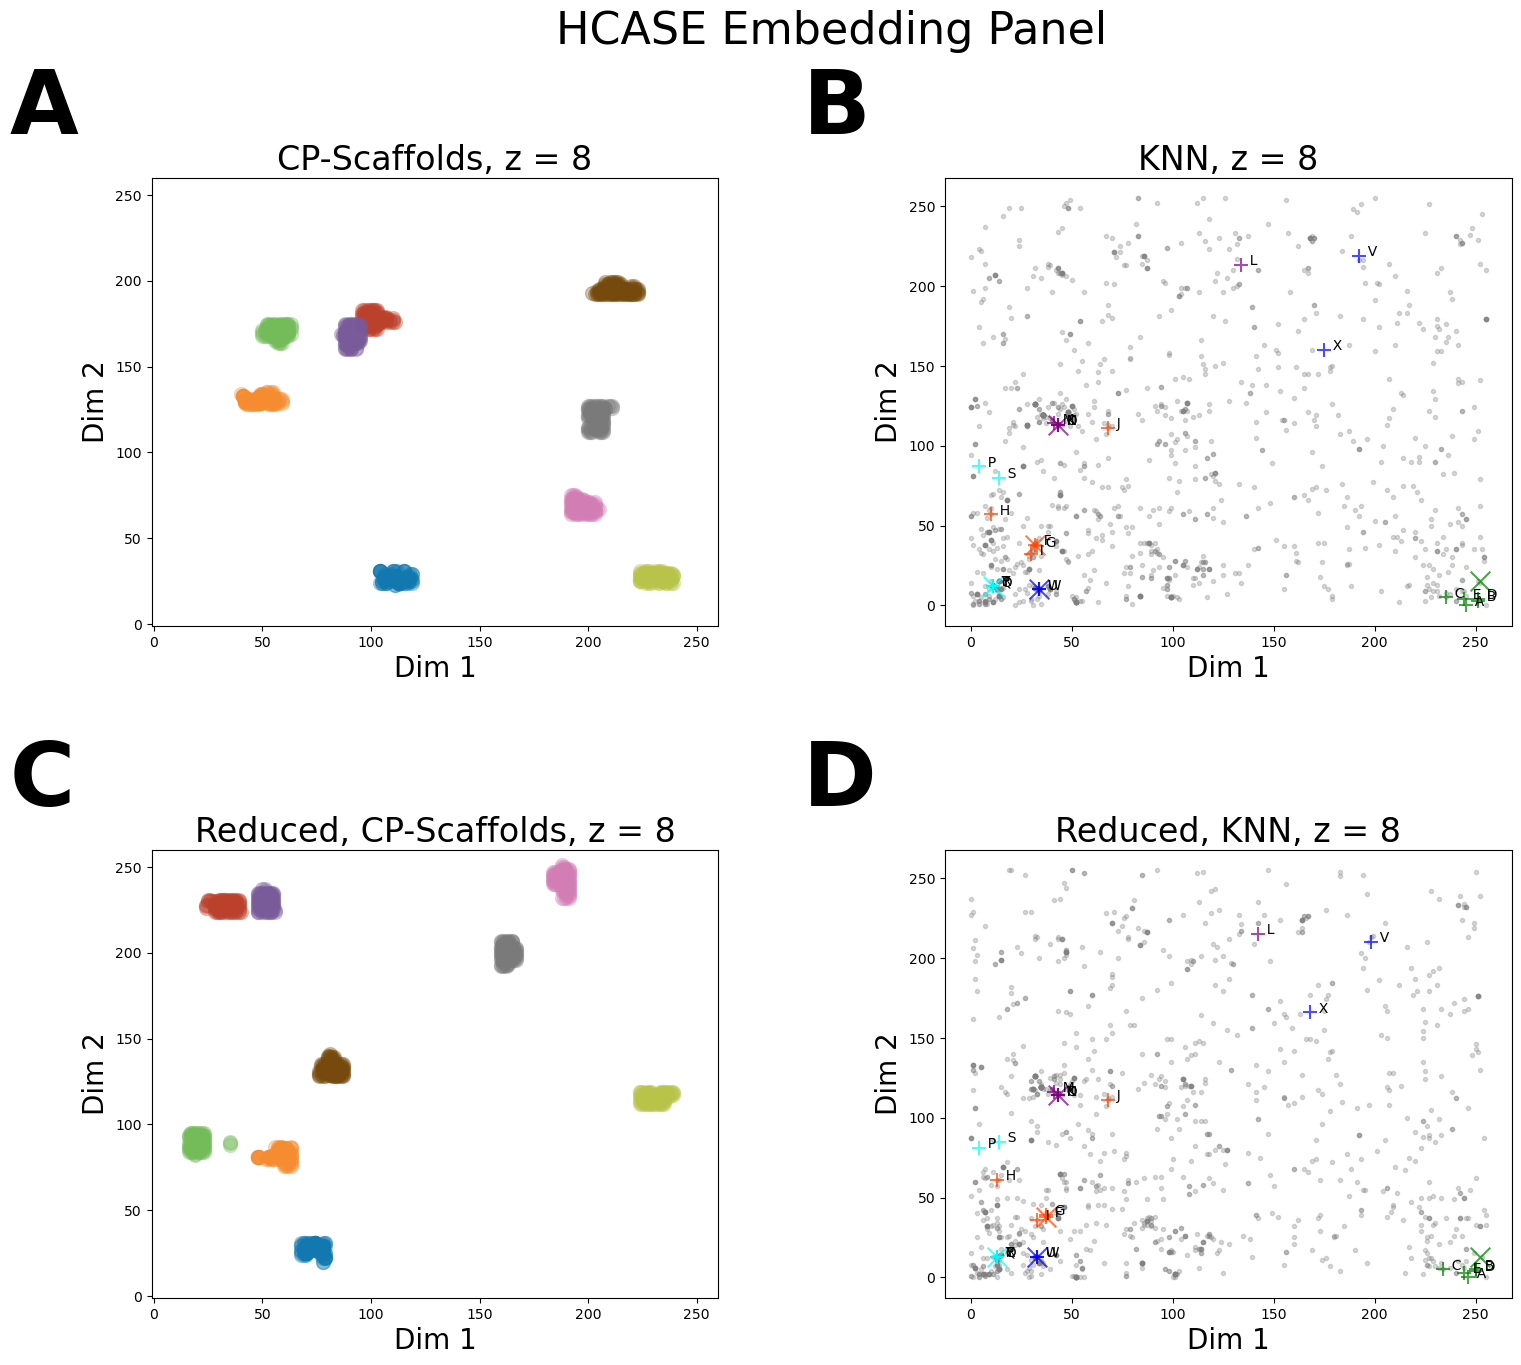

In [12]:
# Plot results

fig = plt.figure()

fig, subfigures = plt.subplots(nrows = 2, ncols = 2, figsize = (17, 14))




df_knns = separate_query_from_target_mols (df_knns)
df_structures = df_structures.rename (columns = {'scaffold_id': 'id'})



# A: CP scaffolds HCASE at z=8




adf_8_a = df_emb[df_emb['hc_order'] == 8].copy()



df_8_color_a = color_scaffolds(adf_8_a, df_structures)

panel_plot_multi_scaffolds (subfigures[0][0], df_8_color_a, subfig_label = 'CP-Scaffolds, z = 8', z = 8)





# B: HCASE embedding of KNNs z=8


df_b = df_knn_emb[df_knn_emb['phc_order'] == 8].copy()
panel_plot_multi (subfigures[0][1], df_b, df_knns, subfig_label = 'KNN, z = 8')




# C: CP scaffolds into reduced HCASE space, z=8


adf_8_c = df_red_emb[df_red_emb['hc_order'] == 8].copy()


df_8_color_c = color_scaffolds(adf_8_c, df_structures)

panel_plot_multi_scaffolds (subfigures[1][0], df_8_color_c, subfig_label = 'Reduced, CP-Scaffolds, z = 8', z = 8)




# D: Drugs HCASE embedding into reduced space, z=8


df_d = df_red_knn_emb[df_red_knn_emb['phc_order'] == 8].copy()
panel_plot_multi (subfigures[1][1], df_d, df_knns, subfig_label = 'Reduced, KNN, z = 8')







subfigures[0][0].text(-0.25, 1.25, "A", transform=subfigures[0][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[0][1].text(-0.25, 1.25, "B", transform=subfigures[0][1].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][0].text(-0.25, 1.25, "C", transform=subfigures[1][0].transAxes,
            fontsize=64, fontweight='bold', va='top')
subfigures[1][1].text(-0.25, 1.25, "D", transform=subfigures[1][1].transAxes,
            fontsize=64, fontweight='bold', va='top')



fig.suptitle('HCASE Embedding Panel', fontsize = 32, y = 1.02)
#fig.supylabel('Dim 2')


plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.5)

plt.savefig (fname_out_panel_hcase_plot, dpi=300)

plt.show()





In [13]:
# References:

# Ref: https://github.com/matplotlib/matplotlib/issues/3466/
# Ref: https://htmlcolorcodes.com/color-picker/
# Ref: https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/
# Ref: https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html
# Ref: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
# Ref: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
# Ref: https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers
# Ref: https://matplotlib.org/3.1.1/gallery/shapes_and_collections/scatter.html
# Ref: https://matplotlib.org/3.1.1/tutorials/colors/colors.html
# Ref: https://python-graph-gallery.com/106-seaborn-style-on-matplotlib-plot/
# Ref: https://python-graph-gallery.com/122-multiple-lines-chart/
# Ref: https://python-graph-gallery.com/125-small-multiples-for-line-chart/
# Ref: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/
# Ref: https://seaborn.pydata.org/examples/many_facets.html
# Ref: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
# Ref: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
# Ref: https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python
# Ref: https://stackoverflow.com/questions/31686530/matplotlib-generate-a-new-graph-in-a-new-window-for-subsequent-program-runs/31686783
# Ref: https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph
# Ref: https://stackoverflow.com/questions/57568311/matplotlib-scatter-issue-with-python-3-x
# Ref: https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/colorPaletteCheatsheet.pdf
# Ref: https://www.pluralsight.com/guides/choosing-color-palettes
# Ref: https://www.rdkit.org/docs/GettingStartedInPython.html
# Ref: https://www.rdkit.org/docs/source/rdkit.Chem.Draw.html
# Ref: https://www.science-emergence.com/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/
# Ref: ChatGPT 4.0 by OpenAI [https://chat.openai.com]